# Прогнозирование цен на жилье с использованием многомерной линейной регрессии
Используются только библиотеки Pandas и NumPy.
## 1. Введение

Это классический пример для начинающих в машинном обучении. Набор данных содержит данные о продажах домов в округе Кинг, США, за период с мая 2014 по май 2015 года. Вы можете найти полный набор данных на [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). Прежде чем продолжить, настоятельно рекомендуется перейти по вышеупомянутой ссылке и ознакомиться с исходным набором данных.

Наша цель - применить многомерную линейную регрессию, чтобы спрогнозировать цену любого данного дома в этом районе, учитывая ряд его характеристик (например, количество ванных комнат, год постройки дома и т.д.). Для этой цели используются библиотеки NumPy и Pandas (а также Matplotlib и Seaborn для визуализации). Хотя некоторые могут счесть код излишне длинным и подробным, я считаю, что он может дать читателю хорошее представление о том, что на самом деле происходит в таких моделях, и, таким образом, может иметь большую образовательную ценность (особенно для начинающих). Код в значительной степени основан на стэнфордском курсе машинного обучения на [Coursera](https://www.coursera.org/learn/machine-learning) Эндрю Нга и может быть очень полезен тем, кто прошел его и хочет увидеть реализацию на Python.
## 2. Первоначальное изучение набора данных

В этом разделе мы собираемся настроить среду, импортировав необходимые библиотеки, а также загрузив наши данные в фрейм данных Pandas.


In [1]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# считывание данных о доме во фрейм данных
df = pd.read_csv('kc_house_data.csv')

Теперь мы можем продолжить и посмотреть, как выглядит наш набор данных, а также получить представление о его статистических свойствах.

In [2]:
# вывод на экран первых пять записей
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# описание набора данных с округлением до сотых 
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


Мы можем увидеть, что каждая запись имеет идентификатор, то есть идентификационный номер, а также дату, когда произошла транзакция. Эти две колонки не имеют отношения к нашему анализу, поэтому мы удалим их и продолжим без них.

In [4]:
# удалим столбцы идентификатора и даты
df = df.drop(['id', 'date'], axis=1)

Внимательный читатель, наверное, уже заметил, что существует 21 613 наблюдений или записей. Давайте подтвердим это.

In [5]:
# вывод числа записей
len(df)

21613

Однако нам также нужно посмотреть, сколько характеристик имеется в нашем наборе данных.

In [6]:
# вывод количества характеристик (столбцов)
len(df.columns)

19

Поскольку количество характеристик невелико, вероятно, было бы хорошей идеей попробовать альтернативную реализацию, используя метод нормального уравнения. Тем не менее, мы продолжим и проверим типы данных и то, правильно ли они были интерпретированы.

In [7]:
# проверка типов данных
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Кроме того, всегда полезно проверить наличие любых отсутствующих значений или "NaN" в наборе данных.

In [8]:
# вывод количества записей с нулевыми данными
df.isnull().values.sum()

0

## 3. Выбор характеристик
В этом разделе мы собираемся использовать метод фильтрации, чтобы выбрать, какие характеристики на самом деле будут использоваться в алгоритме линейной регрессии. Однако прежде всего мы должны указать, какую целевую переменную мы хотим спрогнозировать (цену) и какие характеристики мы собираемся использовать (все остальные).

In [9]:
# Обявление/назначение цели и характеристик
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

На этом этапе мы собираемся проверить корреляцию между нашей целевой переменной (ценой) и характеристиками.

In [10]:
# корреляция характеристиков с целевой переменной
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Используя метод фильтрации, мы собираемся выбрать, какие характеристики будут использоваться впоследствии. Хотя это произвольно и может быть оспорено, мы удалим все характеристики у которых корреляция с целевой переменной по модулю меньше 0,2.

In [11]:
# корреляции с целевой переменной
cor_target = abs(correlations['price'])

# вывод характеристик с корреляцией < 0.2
removed_features = cor_target[cor_target < 0.2]
removed_features

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64

In [12]:
# удаляем характеристики с корреляцией < 0.2
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15'], axis=1)

Кроме того, мы также должны убедиться, что остальные характеристики не очень сильно коррелируют друг с другом, т.е. что они являются - более или менее - независимыми переменными. Давайте построим корреляционную матрицу Пирсона, используя Matplotlib и Seaborn.

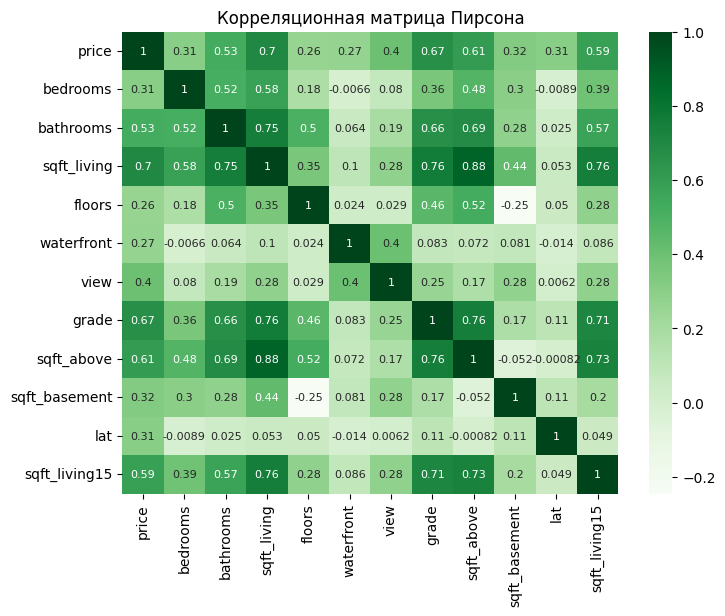

In [13]:
# постройка корреляционной матрицы Пирсона
fig_1 = plt.figure(figsize=(8, 6))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Корреляционная матрица Пирсона')
plt.show()

Из приведенного выше рисунка мы можем видеть, что некоторые характеристики сильно коррелируют друг с другом. Мы произвольно проведем поиск корреляций выше 0,75 и удалим объекты с наименьшей корреляцией с целевой переменной (ценой).

In [14]:
# определим самые высокие взаимокорреляции
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,0.762704,0.876597,-,-,0.75642
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1.0,0.755923,-,-,-
sqft_above,-,-,-,0.876597,-,-,-,0.755923,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


Еще раз, это спорно и является результатом моей собственной интерпретации, но я придерживаюсь мнения, что, хотя существуют наборы переменных, которые действительно сильно коррелируют, они в конечном счете представляют собой две независимые переменные и должны быть сохранены такими, какие они есть. Я полагаю, что это имеет место со следующими наборами переменных:
- ("bathrooms", "sqft_living")
- ("grade", "sqft_living")
- ("grade", sqft_above")

Напротив, я считаю, что переменная "sqft_living" не только сильно коррелирует с "sqft_above" (0,877) и "sqft_living15" (0,756), но и что она действительно представляет большую часть информации, необходимой нам для линейной регрессии. Действительно, согласно описанию исходного набора данных, найденного на [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction), "sqft_above" - это площадь дома, не считая подвала, а "sqft_living15" - это площадь гостиной в 2015 году (что подразумевает ремонт). Также полезно отметить, что переменная "grade" задается системой оценки округа Кинг и относится к типам используемых материалов и качеству изготовления (более подробную информацию можно найти [здесь](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g)).

Таким образом, я решил удалить еще две характеристики ("sqft_above" и "sqft_living15") и сохранить "sqft_living", которая имеет самую высокую корреляцию с целевой переменной (0,702).


In [15]:
# удаление характеристик, которые сильно коррелирует с "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

В конечном счете у нас остается 9 характеристик, которые будут использоваться для линейной регрессии. Давайте обновим характеристики и сохраним их количество.

In [16]:
# обновление характеристик и сохранение их количества 
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

9

## 4. Многомерная линейная регрессия
В этом разделе мы собираемся реализовать наш алгоритм линейной регрессии. В самом начале мы собираемся нормализовать функции, чтобы обеспечить эффективную конвергенцию модели.

In [17]:
# нормализация характеристик
df.iloc[:, 1:] = (df - df.mean())/df.std()

Теперь мы собираемся создать матрицы X, y и тета (Θ). Мы могли бы также использовать циклы for, однако библиотека NumPy способна более эффективно обрабатывать численные вычисления, если операции векторизованы.

In [18]:
# создание X, y и тета
X = df.iloc[:, 1:]
ones = np.ones([len(df), 1])
X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, 0:1].values
theta = np.zeros([1, len_of_features + 1])

Мы также собираемся сохранить целевую переменную и проверить размер матриц.

In [19]:
# сохранение целевой переменной
target = y

# вывод размеров матриц
X.shape, y.shape, theta.shape

((21613, 10), (21613, 1), (1, 10))

На этом этапе определим функцию, которая вычисляет функцию затрат J(Θ).

In [20]:
# определение функции затрат
def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

Необходимо задать параметры модели, т.е. количество общих итераций, а также скорость обучения альфа (α). Не стесняйтесь экспериментировать, изменяя эти параметры и проверяя, сходится ли модель и насколько быстро.

In [21]:
# установка числа итерраций и скорость обучения
alpha = 0.01
iterations = 500

Мы также определим функцию, которая выполняет градиентный спуск, минимизируя функцию затрат.

In [22]:
# определение функции градиентного спуска
def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

Теперь самый важный шаг, на котором мы фактически выполним градиентный спуск и напечатаем окончательную тэту. Именно здесь происходит "обучающая" часть.

In [23]:
# выполнение градиентного спуска и вывод конечной тэты
final_theta, cost = gradientdescent(X, y, theta, iterations, alpha)
final_theta.round(2)

array([[536539.5 , 313029.26,  -9094.94,  -7167.77,  31518.16,  -4641.62,
          9291.36,   6753.66,  26431.37,   2035.61]])

Более того, мы рассчитаем и выведем окончательную стоимость.

In [24]:
# вычисление и вывод окончательной стоимости
final_cost = computecost(X, y, final_theta)
final_cost.round(2)

649331639.62

Чтобы проверить, сходится ли наш алгоритм, мы построим график зависимости итераций от стоимости.

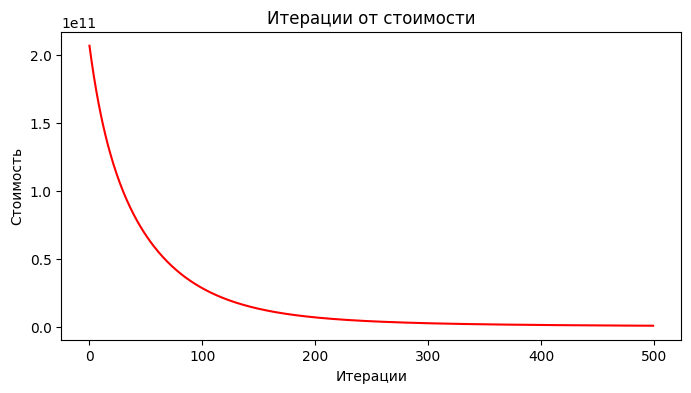

In [25]:
# график итераций в зависимости от стоимости
fig_2, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Итерации')
ax.set_ylabel('Стоимость')
ax.set_title('Итерации от стоимости')
plt.show()

Кроме того, мы определим функцию, которая вычисляет среднеквадратичную ошибку (RMSE), чтобы измерить различия между значениями, предсказанными нашей моделью, и наблюдаемыми значениями, которые мы имели в начале нашего анализа. RMSE - это абсолютный показатель соответствия, и он выражен в тех же единицах, что и наша переменная ответа, то есть цена в долларах США.

In [26]:
# определение rmse функции
def rmse(target, final_theta):
    predictions = X @ final_theta.T
    return np.sqrt(((predictions[:, 0] - target[:, 0]) ** 2).mean())

# вычисление и вывод среднеквадратичной ошибки 
rmse_val = rmse(target, final_theta)
rmse_val.round(2)

36036.97

Мы видим, что значение RMSE является небольшим (~36 000 долларов США). Так как, если мы примем во внимание, что цены в исходном наборе данных варьировались от 75 000 до 7 700 000 долларов США и имели стандартное отклонение приблизительно в 367 000 долларов США (см. раздел 2), это значение RMSE можно считать нормальным. Наилучшим подходом было бы реализовать различные алгоритмы машинного обучения, сравнить их результаты и решить, какой из них лучше всего подходит для нашего случая.

Наконец, давайте сделаем примерное предсказание, чтобы проверить, работает ли наш алгоритм так, как задумано. В наших данных мы используем нормализованные характеристики первого наблюдения, цена которого первоначально составляла 221 900 долларов США.

In [27]:
# вывод предположения о выборке для первого наблюдения
predictions = X @ final_theta.T
str(predictions[0].round(2))

'[233620.11]'

## 5. Заключение
В этой статье мы применили алгоритм многомерной линейной регрессии, чтобы спрогнозировать цены продажи жилья в округе Кинг, США. Код был очень подробным и включал предварительный анализ набора данных и всесторонний выбор характеристик. Чтобы поближе взглянуть на то, что происходит за кулисами, мы использовали только библиотеки Pandas и NumPy.

Как я уже говорил в начале, я открыт для любых вопросов, комментариев и идей о том, как улучшить ядро. Я надеюсь, что это оказалось полезным и что вам понравилось.

Если вы хотите получить доступ к исходному коду и записной книжке Jupyter, вы можете найти их на [GitHub](https://github.com/droussis/linear_regression_house_prices).

Помимо курса Эндрю Нг (и, в частности, содержания недель 1 и 2), в моей реализации использовались следующие веб-сайты, на которые оказали влияние:
- https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905
- https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137
- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
- https://www.dataquest.io/blog/understanding-regression-error-metrics/
- https://www.statisticshowto.datasciencecentral.com/rmse/
- https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/